### COVID cases and mask mandate analysis for Macomb County, Michigan
In this notebook, we will explore the impact of mask mandate in the number and percent change of confirmed cases in Macomb County, Michigan ranging from Feb 2020 to October 2022. The analysis begins with data manipulation to process the data into the format that is needed to plot the visualisations. Comments and explanation will be included in the notebook as markdown in order to guide the reader throughout the analysis.

In [191]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

Users can insert their file path here in order to reuse the notebook. Should the users are interested to study a different state or county, change the target_state and target_county variable.

In [192]:
# Data path 
dir_path = '<insert path here>'
raw_confirmed_path = 'RAW_us_confirmed_cases.csv' # file containing confirmed cases.
raw_death_path ='RAW_us_deaths.csv'               # file containing death cases.
mask_mandate = 'face_mask_mandate.csv'            # file containing mask mandate information.

# county in study
target_state = 'Michigan'
target_county = 'Macomb'



In [193]:
# Read in data and filter out state of study
raw_confirmed = pd.read_csv(os.path.join(dir_path,raw_confirmed_path))
raw_confirmed = raw_confirmed[raw_confirmed['Admin2']== target_county].reset_index(drop = True)

raw_death = pd.read_csv(os.path.join(dir_path,raw_death_path))
raw_death = raw_death[raw_death['Admin2']== target_county].reset_index(drop = True)


In [194]:
raw_death.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/21/22,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22
0,Michigan,Macomb,84026099,US,USA,840,26099.0,US,42.691584,-82.927528,...,4264,4264,4264,4264,4281,4281,4281,4281,4281,4281


This process filters out data from 2020-02-01 to 2022-10-30.

In [195]:
# Filter out dates from 2020-02-01 to 2022-10-30
raw_confirmed_filter = pd.concat([pd.DataFrame(raw_confirmed.loc[:,'Province_State':'Long_']), pd.DataFrame(raw_confirmed.loc[:,'2/1/20':'10/30/22'])], axis = 1)
print('Shape of raw_confirmed: {}'.format(raw_confirmed_filter.shape))
raw_confirmed_filter.head()

Shape of raw_confirmed: (1, 1013)


,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/21/22,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22
0,Michigan,Macomb,84026099,US,USA,840,26099.0,US,42.691584,-82.927528,...,279512,279512,279512,279512,281008,281008,281008,281008,281008,281008


Now we need to extract the time series data and manipulate it into the correct long format in order to plot the charts later.

In [196]:
# Extracting time series
raw_confirmed_series = raw_confirmed_filter.iloc[0,-1003:]
raw_confirmed_series = raw_confirmed_series.rename('Accumulated Confirmed Cases')


In [197]:
raw_death_filter = pd.concat([pd.DataFrame(raw_death.loc[:,'Province_State':'Long_']), pd.DataFrame(raw_death.loc[:,'2/1/20':'10/30/22'])], axis = 1)
print('Shape of raw_confirmed: {}'.format(raw_death_filter.shape))
raw_death_filter.head()

Shape of raw_confirmed: (1, 1013)


,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/21/22,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22
0,Michigan,Macomb,84026099,US,USA,840,26099.0,US,42.691584,-82.927528,...,4264,4264,4264,4264,4281,4281,4281,4281,4281,4281


In [198]:
# Extracting time series
raw_death_series = raw_death_filter.iloc[0,-1003:]
raw_death_series = raw_death_series.rename('Accumulated Death Cases')
raw_death_series

2/1/20         0
2/2/20         0
2/3/20         0
2/4/20         0
2/5/20         0
            ... 
10/26/22    4281
10/27/22    4281
10/28/22    4281
10/29/22    4281
10/30/22    4281
Name: Accumulated Death Cases, Length: 1003, dtype: object

In [199]:
# Read in mask mandate data
mask_df = pd.read_csv(os.path.join(dir_path,mask_mandate))
mask_df.head()
mask_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   State_Tribe_Territory          493 non-null    object
 1   County_Name                    493 non-null    object
 2   FIPS_State                     493 non-null    int64 
 3   FIPS_County                    493 non-null    int64 
 4   date                           493 non-null    object
 5   order_code                     493 non-null    int64 
 6   Face_Masks_Required_in_Public  493 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.1+ KB


In [200]:
# Combine confirmed and death cases into one dataframe
combined = pd.concat([raw_confirmed_series,raw_death_series],axis = 1)
combined.index = pd.to_datetime(combined.index)
combined.head()

,Accumulated Confirmed Cases,Accumulated Death Cases
2020-02-01,0,0
2020-02-02,0,0
2020-02-03,0,0
2020-02-04,0,0
2020-02-05,0,0


The data downloaded is an accumulated count of confirm COVID cases, so we use the diff() function to find the daily confirm cases.

In [201]:
# Convert accumulated data into daily using diff()
combined['Daily Confirmed Cases'] = combined['Accumulated Confirmed Cases'].diff()
combined['Daily Death Cases'] = combined['Accumulated Death Cases'].diff()

In [202]:
combined.head()

,Accumulated Confirmed Cases,Accumulated Death Cases,Daily Confirmed Cases,Daily Death Cases
2020-02-01,0,0,NaN,NaN
2020-02-02,0,0,0,0
2020-02-03,0,0,0,0
2020-02-04,0,0,0,0
2020-02-05,0,0,0,0


In [203]:
mask_df[mask_df['Face_Masks_Required_in_Public'] == 'Yes']['date']

16     4/26/20
17     4/27/20
18     4/28/20
19     4/29/20
20     4/30/20
        ...   
433    6/17/21
434    6/18/21
435    6/19/21
436    6/20/21
437    6/21/21
Name: date, Length: 419, dtype: object

We now know that the mask mandate period is from April 26 2020 to June 21 2021. We can include these two lines in the time series chart to see if mask mandate makes any difference to the daily confirmed cases.

### Visualization

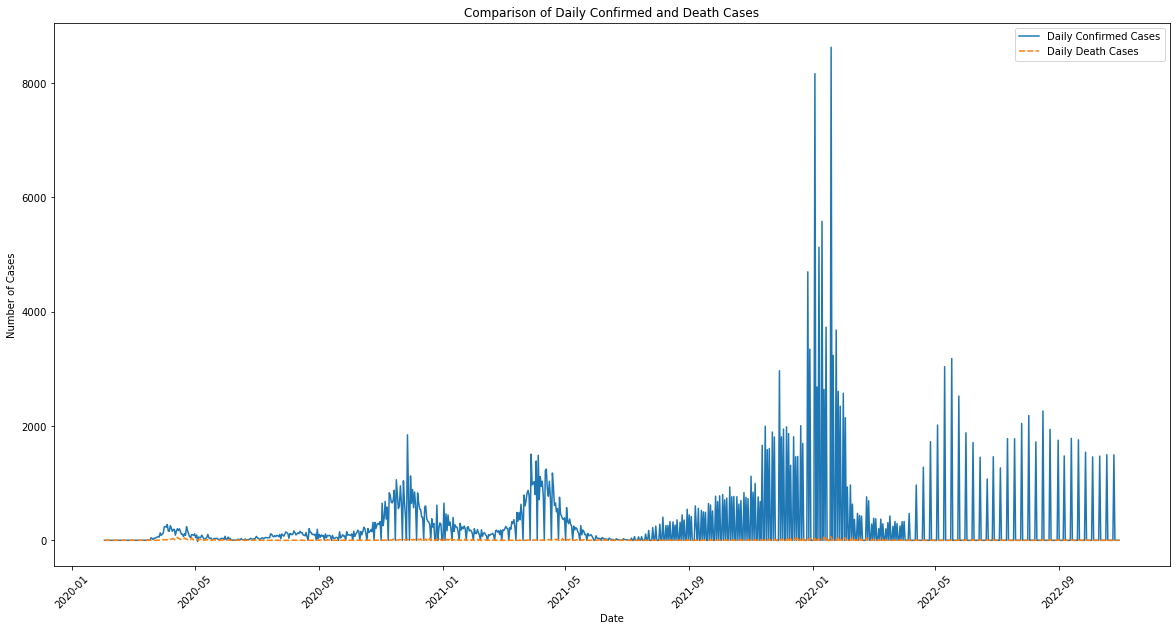

In [204]:
# 
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(data = combined[['Daily Confirmed Cases','Daily Death Cases']])
plt.title('Comparison of Daily Confirmed and Death Cases')
plt.xlabel('Date') 
plt.ylabel('Number of Cases') 
plt.xticks(rotation = 45);


We can see from the chart above that there are many days with 0 cases, likely due to data mishandling. This can be mitigated using rolling average. A 5 day rolling window has been chosen to smoothen the curve. Then we will study the percentage change of the 5-day moving average.

In [206]:
# Calculate the moving average
combined['5-day Moving Average for Confirmed Cases'] = combined['Daily Confirmed Cases'].rolling(5).mean()

# Calculate the percent change in moving average.
combined['Percent Change for Moving Average'] = combined['5-day Moving Average for Confirmed Cases'].pct_change()


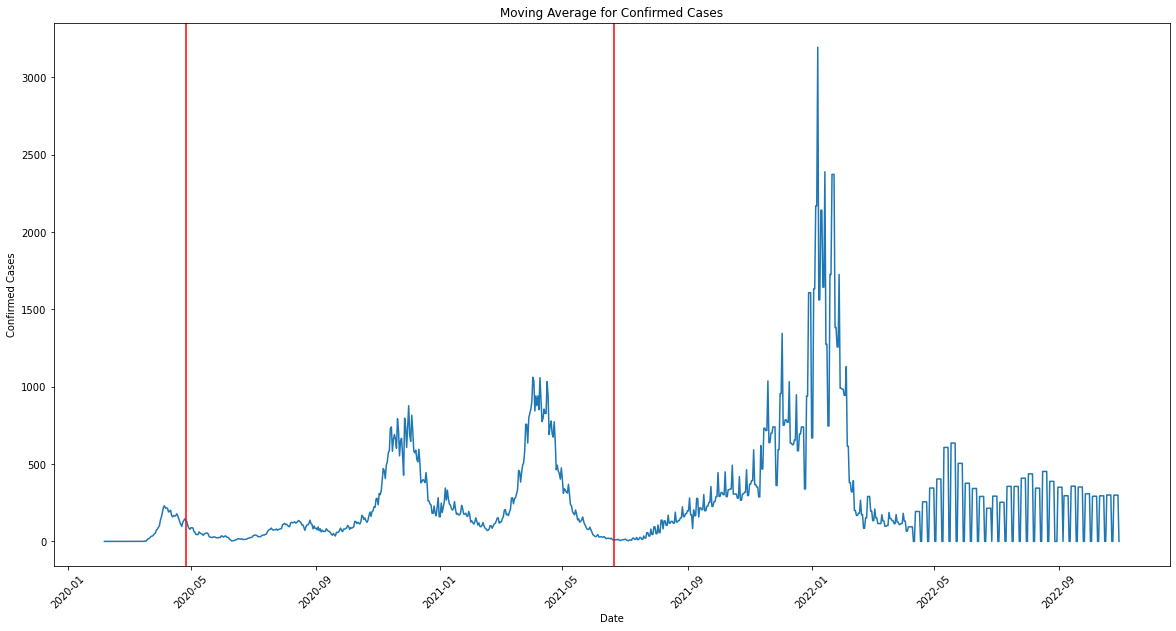

In [207]:
# Visualising the moving average
plt.title("Trend for 5-Day Moving Average")
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(data = combined['5-day Moving Average for Confirmed Cases'])
plt.axvline(x = pd.to_datetime('4/26/20'), color = 'r', label = 'Beginning of Mask Mandate')
plt.axvline(x = pd.to_datetime('6/21/21'), color = 'r', label = 'Beginning of Mask Mandate')


plt.title('Moving Average for Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation = 45);

The period between the two red lines indicates the time where mask mandate is being enforced in Macomb county, Michigan. We can see that there are two peaks during that period. A quick search on the internet shows that during the first peak in November 2020 and December 2020, Macomb county went under a lock down, which could have flattened the curve. After mask mandate was lifted in June 2021, we can see a clear climb in cases starting in September 2021, which is the beginning of the Delta variant. 

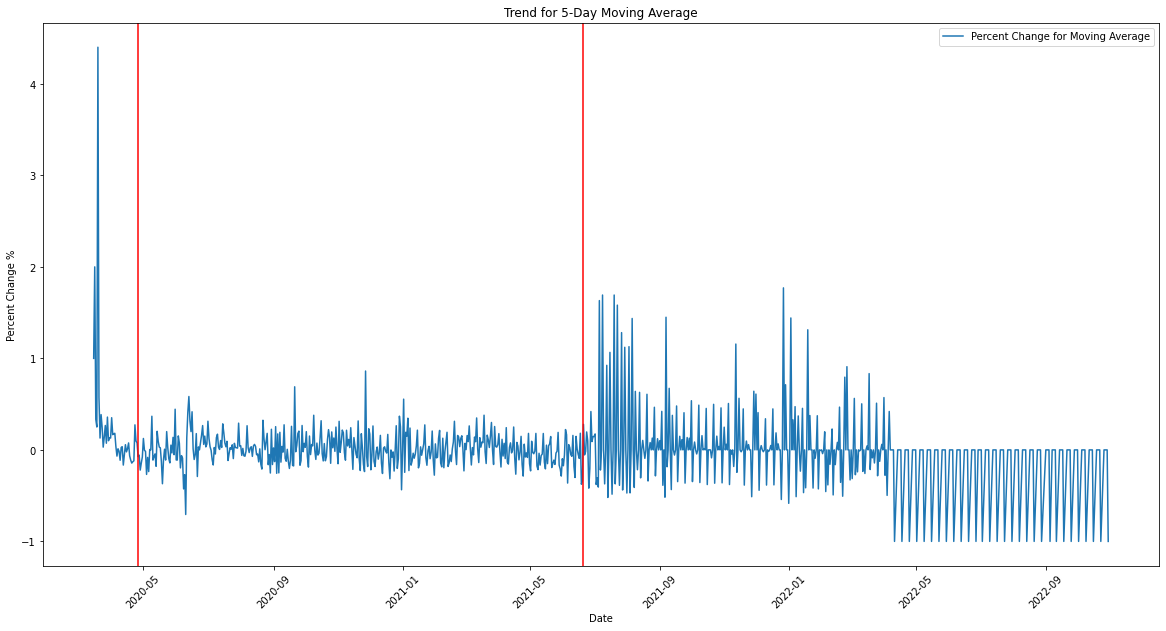

In [ ]:
# Visualising the percent change
plt.title("Trend for 5-Day Moving Average")
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(data = combined[['Percent Change for Moving Average']])
plt.axvline(x = pd.to_datetime('4/26/20'), color = 'r', label = 'Beginning of Mask Mandate')
plt.axvline(x = pd.to_datetime('6/21/21'), color = 'r', label = 'Beginning of Mask Mandate')

plt.xlabel('Date')
plt.ylabel('Percent Change %')
plt.xticks(rotation = 45);

Here, we are taking a closer look at the impact of mask mandate by looking at the percentage change in confirmed cases. We can see during the period of mask mandate, the percentage change is constantly fluctuating around 0%. However, after the mask mandate has been lifted, the fluctuation increases by a big degree. The percentage change after April 2022 shows a very consistent trend and does not follow any patterns during the period before that. It is suspected that there are alot of data mishandling during this period.